In [1]:
import pandas as pd
import info_theory
import plotting
import preprocess
import networkx as nx

In [15]:
import matplotlib.pyplot as plt
import math
import numpy as np
np.math = math
from idtxl.data import Data
from idtxl.multivariate_te import MultivariateTE
from idtxl.visualise_graph import plot_network
import pickle


In [3]:
# Define assets and file paths
assets = ["commodity", "credit", "currency", "energy", "equity", "interest", "metals", "real_estate", "volatility"]
file_paths = {asset: f"../data/{asset}_data.xlsx" for asset in assets}

# Load data
aligned_data, tickers = preprocess.load_and_align_data(file_paths)

# Drop tickers with many missing points
aligned_data, tickers = preprocess.drop_short_tickers(aligned_data, tickers, max_nan=50)
aligned_data['GB03'] + 0.1

# Compute log returns
log_returns = preprocess.compute_log_returns(aligned_data)

# Interest data has negative and zero values
# interest_data = aligned_data[tickers['interest']]
# log_returns[tickers["interest"]] = interest_data

# Drop NA
log_returns = log_returns.dropna()

Tickers to drop/replace due to insufficient data:
['FXJPEMCS', 'QCLN']


c:\Users\akhma\OneDrive\Onenote\Python\my_venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [20]:
log_returns

BCOM  CRB CMDT  CRB METL  CRB RIND   SPGSAGP  MOODCAAA  \
Date                                                                     
2005-01-04 -0.006318 -0.009300 -0.027892 -0.009850 -0.023311  0.010989   
2005-01-05 -0.001498  0.001510  0.000483  0.003783 -0.022794 -0.003650   
2005-01-06  0.016104 -0.001476 -0.016444 -0.007361  0.005714  0.001826   
2005-01-07 -0.001910  0.005139  0.018090  0.007579  0.001899 -0.001826   
2005-01-10  0.002492 -0.000171  0.007883  0.003551  0.006311 -0.003663   
...              ...       ...       ...       ...       ...       ...   
2024-11-12 -0.013605 -0.003252 -0.020410 -0.011386 -0.009395  0.021633   
2024-11-13 -0.000863  0.001814 -0.005660 -0.001935 -0.001823  0.015444   
2024-11-14 -0.007853 -0.001122 -0.006477 -0.003030 -0.002832 -0.009625   
2024-11-15  0.001401  0.000524  0.003978  0.001239  0.007099  0.007707   
2024-11-18  0.016269 -0.001422 -0.000164 -0.000388  0.011531 -0.003846   

            LF98TRUU     DJCBP    LMBITR  LC07TRUU  ...      GB03      GT02  \
Date                                                ...                       
2005-01-04  0.000156 -0.004388 -0.000826 -0.002611  ...  0.045245  0.033686   
2005-01-05 -0.001831  0.000733  0.000431 -0.000097  ... -0.013274  0.002809   
2005-01-06 -0.000598 -0.001099  0.000350  0.000516  ... -0.004320 -0.015387   
2005-01-07 -0.000325 -0.000825  0.000709 -0.000226  ...  0.003889  0.010389   
2005-01-10 -0.000885  0.000734  0.000473  0.000323  ...  0.000000  0.007799   
...              ...       ...       ...       ...  ...       ...       ...   
2024-11-12 -0.001196 -0.007839  0.000464 -0.006516  ...  0.000441  0.020240   
2024-11-13 -0.000004 -0.004919  0.000647 -0.000654  ... -0.007748 -0.012515   
2024-11-14 -0.000358 -0.000558  0.000163 -0.000386  ...  0.006424  0.013666   
2024-11-15 -0.002076 -0.002143 -0.000080 -0.000420  ... -0.006202 -0.009709   
2024-11-18  0.000344  0.002423  0.000196  0.001258  ...  0.003327 -0.005591   

                GT10    BCOMPR     DJGSP      REIT    DJUSRE      EPRA  \
Date                                                                     
2005-01-04  0.018582 -0.003148 -0.023747 -0.012812 -0.013447 -0.010845   
2005-01-05 -0.001866  0.000245 -0.003067 -0.038806 -0.038433 -0.005347   
2005-01-06 -0.004681 -0.013124 -0.005429  0.007550  0.007945 -0.002521   
2005-01-07  0.001875 -0.003921  0.003605  0.000287  0.000609  0.014654   
2005-01-10  0.000000  0.000430  0.009189 -0.003294 -0.002088  0.002704   
...              ...       ...       ...       ...       ...       ...   
2024-11-12  0.028397 -0.030627 -0.079413 -0.018950 -0.019279 -0.015614   
2024-11-13  0.005180 -0.006529 -0.014328  0.005783  0.006265 -0.013243   
2024-11-14 -0.003375 -0.004809  0.006074 -0.009676 -0.009653  0.013018   
2024-11-15  0.000676 -0.001897 -0.007903  0.003259  0.001495  0.000201   
2024-11-18 -0.005647  0.019137  0.041726  0.006274  0.007416 -0.017093   

                 VIX       VXN  
Date                            
2005-01-04 -0.007128  0.028313  
2005-01-05  0.007838  0.005964  
2005-01-06 -0.036867 -0.002481  
2005-01-07 -0.006649 -0.049909  
2005-01-10 -0.019462  0.023737  
...              ...       ...  
2024-11-12 -0.015515  0.013334  
2024-11-13 -0.048043 -0.034815  
2024-11-14  0.020474  0.011364  
2024-11-15  0.120342  0.113631  
2024-11-18 -0.035313 -0.003030  

[4860 rows x 30 columns]

In [21]:
abs_log_returns = np.abs(log_returns)
abs_log_returns

BCOM  CRB CMDT  CRB METL  CRB RIND   SPGSAGP  MOODCAAA  \
Date                                                                     
2005-01-04  0.006318  0.009300  0.027892  0.009850  0.023311  0.010989   
2005-01-05  0.001498  0.001510  0.000483  0.003783  0.022794  0.003650   
2005-01-06  0.016104  0.001476  0.016444  0.007361  0.005714  0.001826   
2005-01-07  0.001910  0.005139  0.018090  0.007579  0.001899  0.001826   
2005-01-10  0.002492  0.000171  0.007883  0.003551  0.006311  0.003663   
...              ...       ...       ...       ...       ...       ...   
2024-11-12  0.013605  0.003252  0.020410  0.011386  0.009395  0.021633   
2024-11-13  0.000863  0.001814  0.005660  0.001935  0.001823  0.015444   
2024-11-14  0.007853  0.001122  0.006477  0.003030  0.002832  0.009625   
2024-11-15  0.001401  0.000524  0.003978  0.001239  0.007099  0.007707   
2024-11-18  0.016269  0.001422  0.000164  0.000388  0.011531  0.003846   

            LF98TRUU     DJCBP    LMBITR  LC07TRUU  ...      GB03      GT02  \
Date                                                ...                       
2005-01-04  0.000156  0.004388  0.000826  0.002611  ...  0.045245  0.033686   
2005-01-05  0.001831  0.000733  0.000431  0.000097  ...  0.013274  0.002809   
2005-01-06  0.000598  0.001099  0.000350  0.000516  ...  0.004320  0.015387   
2005-01-07  0.000325  0.000825  0.000709  0.000226  ...  0.003889  0.010389   
2005-01-10  0.000885  0.000734  0.000473  0.000323  ...  0.000000  0.007799   
...              ...       ...       ...       ...  ...       ...       ...   
2024-11-12  0.001196  0.007839  0.000464  0.006516  ...  0.000441  0.020240   
2024-11-13  0.000004  0.004919  0.000647  0.000654  ...  0.007748  0.012515   
2024-11-14  0.000358  0.000558  0.000163  0.000386  ...  0.006424  0.013666   
2024-11-15  0.002076  0.002143  0.000080  0.000420  ...  0.006202  0.009709   
2024-11-18  0.000344  0.002423  0.000196  0.001258  ...  0.003327  0.005591   

                GT10    BCOMPR     DJGSP      REIT    DJUSRE      EPRA  \
Date                                                                     
2005-01-04  0.018582  0.003148  0.023747  0.012812  0.013447  0.010845   
2005-01-05  0.001866  0.000245  0.003067  0.038806  0.038433  0.005347   
2005-01-06  0.004681  0.013124  0.005429  0.007550  0.007945  0.002521   
2005-01-07  0.001875  0.003921  0.003605  0.000287  0.000609  0.014654   
2005-01-10  0.000000  0.000430  0.009189  0.003294  0.002088  0.002704   
...              ...       ...       ...       ...       ...       ...   
2024-11-12  0.028397  0.030627  0.079413  0.018950  0.019279  0.015614   
2024-11-13  0.005180  0.006529  0.014328  0.005783  0.006265  0.013243   
2024-11-14  0.003375  0.004809  0.006074  0.009676  0.009653  0.013018   
2024-11-15  0.000676  0.001897  0.007903  0.003259  0.001495  0.000201   
2024-11-18  0.005647  0.019137  0.041726  0.006274  0.007416  0.017093   

                 VIX       VXN  
Date                            
2005-01-04  0.007128  0.028313  
2005-01-05  0.007838  0.005964  
2005-01-06  0.036867  0.002481  
2005-01-07  0.006649  0.049909  
2005-01-10  0.019462  0.023737  
...              ...       ...  
2024-11-12  0.015515  0.013334  
2024-11-13  0.048043  0.034815  
2024-11-14  0.020474  0.011364  
2024-11-15  0.120342  0.113631  
2024-11-18  0.035313  0.003030  

[4860 rows x 30 columns]

In [28]:
sqr_log_returns = log_returns ** 2
sqr_log_returns

BCOM      CRB CMDT      CRB METL      CRB RIND   SPGSAGP  \
Date                                                                           
2005-01-04  3.991828e-05  8.649901e-05  7.779691e-04  9.703144e-05  0.000543   
2005-01-05  2.243055e-06  2.281208e-06  2.334241e-07  1.431354e-05  0.000520   
2005-01-06  2.593386e-04  2.178620e-06  2.703917e-04  5.418315e-05  0.000033   
2005-01-07  3.647865e-06  2.641407e-05  3.272553e-04  5.744659e-05  0.000004   
2005-01-10  6.209186e-06  2.920357e-08  6.214274e-05  1.260698e-05  0.000040   
...                  ...           ...           ...           ...       ...   
2024-11-12  1.851020e-04  1.057257e-05  4.165853e-04  1.296319e-04  0.000088   
2024-11-13  7.445975e-07  3.290412e-06  3.203214e-05  3.743684e-06  0.000003   
2024-11-14  6.166864e-05  1.258081e-06  4.195422e-05  9.178341e-06  0.000008   
2024-11-15  1.961465e-06  2.741461e-07  1.582690e-05  1.534631e-06  0.000050   
2024-11-18  2.646857e-04  2.021544e-06  2.697455e-08  1.506342e-07  0.000133   

            MOODCAAA      LF98TRUU         DJCBP        LMBITR      LC07TRUU  \
Date                                                                           
2005-01-04  0.000121  2.424834e-08  1.925786e-05  6.827586e-07  6.819130e-06   
2005-01-05  0.000013  3.353399e-06  5.369005e-07  1.858004e-07  9.379460e-09   
2005-01-06  0.000003  3.577815e-07  1.208469e-06  1.221786e-07  2.666816e-07   
2005-01-07  0.000003  1.057750e-07  6.810734e-07  5.023959e-07  5.102970e-08   
2005-01-10  0.000013  7.835138e-07  5.381814e-07  2.238176e-07  1.041322e-07   
...              ...           ...           ...           ...           ...   
2024-11-12  0.000468  1.430823e-06  6.144737e-05  2.155214e-07  4.245951e-05   
2024-11-13  0.000239  1.390263e-11  2.419687e-05  4.182784e-07  4.276519e-07   
2024-11-14  0.000093  1.281730e-07  3.118097e-07  2.666635e-08  1.488910e-07   
2024-11-15  0.000059  4.309835e-06  4.594265e-06  6.365121e-09  1.760527e-07   
2024-11-18  0.000015  1.182059e-07  5.869293e-06  3.845033e-08  1.583145e-06   

            ...          GB03      GT02          GT10        BCOMPR     DJGSP  \
Date        ...                                                                 
2005-01-04  ...  2.047090e-03  0.001135  3.452986e-04  9.909336e-06  0.000564   
2005-01-05  ...  1.761880e-04  0.000008  3.482357e-06  5.995304e-08  0.000009   
2005-01-06  ...  1.865947e-05  0.000237  2.190765e-05  1.722369e-04  0.000029   
2005-01-07  ...  1.512069e-05  0.000108  3.515078e-06  1.537677e-05  0.000013   
2005-01-10  ...  0.000000e+00  0.000061  0.000000e+00  1.851577e-07  0.000084   
...         ...           ...       ...           ...           ...       ...   
2024-11-12  ...  1.945795e-07  0.000410  8.063718e-04  9.379980e-04  0.006306   
2024-11-13  ...  6.002665e-05  0.000157  2.682834e-05  4.262614e-05  0.000205   
2024-11-14  ...  4.126479e-05  0.000187  1.139036e-05  2.312766e-05  0.000037   
2024-11-15  ...  3.845947e-05  0.000094  4.568463e-07  3.597997e-06  0.000062   
2024-11-18  ...  1.106927e-05  0.000031  3.188344e-05  3.662115e-04  0.001741   

                    REIT        DJUSRE          EPRA       VIX       VXN  
Date                                                                      
2005-01-04  1.641350e-04  1.808272e-04  1.176053e-04  0.000051  0.000802  
2005-01-05  1.505903e-03  1.477111e-03  2.858524e-05  0.000061  0.000036  
2005-01-06  5.700963e-05  6.312087e-05  6.357084e-06  0.001359  0.000006  
2005-01-07  8.261322e-08  3.703172e-07  2.147265e-04  0.000044  0.002491  
2005-01-10  1.085287e-05  4.359560e-06  7.310589e-06  0.000379  0.000563  
...                  ...           ...           ...       ...       ...  
2024-11-12  3.591171e-04  3.716912e-04  2.437822e-04  0.000241  0.000178  
2024-11-13  3.343926e-05  3.924963e-05  1.753845e-04  0.002308  0.001212  
2024-11-14  9.362850e-05  9.317388e-05  1.694711e-04  0.000419  0.000129  
2024-11-15  1.062221e-05  2.235646e-06  4.033396e-08  0.014

Adding data with properties: 30 processes, 4860 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3,

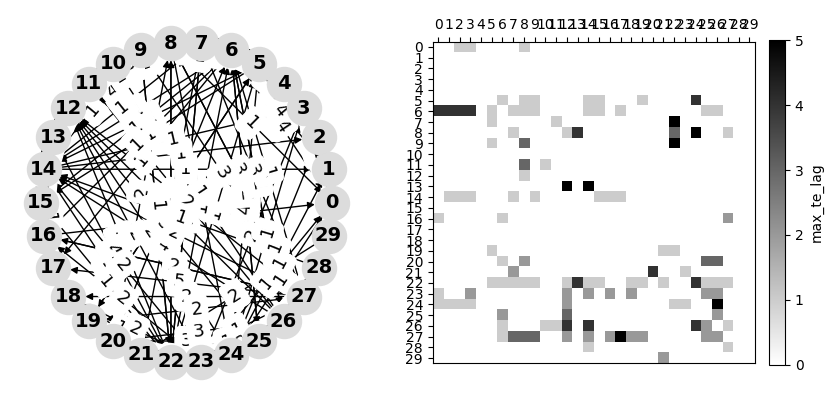

In [10]:
data_array = log_returns.to_numpy()
data_array = np.expand_dims(data_array, axis=2)

data = Data()
data.set_data(data_array, dim_order='spr')

network_analysis = MultivariateTE()
settings = {
    "cmi_estimator": "JidtGaussianCMI",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
}

results = network_analysis.analyse_network(settings=settings, data=data)

results.print_edge_list(weights="max_te_lag", fdr=False)
plot_network(results=results, weights="max_te_lag", fdr=False)
plt.show()

In [11]:
import pickle

with open("idtxl_log_returns_tickers", "wb") as f:
    pickle.dump(results, f)

In [17]:
results

In [29]:
n_nodes = len(log_returns.columns)
te_matrix = np.zeros((n_nodes, n_nodes))

for target in results.targets_analysed:
    res = results.get_single_target(target, fdr=False)

    te_vals = res["selected_sources_te"]
    if te_vals is None:
        continue
    
    sources = [src for src, _ in res["selected_vars_sources"]]

    for src, te in zip(sources, te_vals):
        te_matrix[src, target] = te

In [36]:
def adj_matrix_to_graph(data, adj_matrix):
    node_labels = data.columns
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
    mapping = {i: name for i, name in enumerate(node_labels)}
    G = nx.relabel_nodes(G, mapping)
    return G

In [37]:
G = adj_matrix_to_graph(log_returns, te_matrix)

In [43]:
tickers

{'commodity': ['BCOM', 'CRB CMDT', 'CRB METL', 'CRB RIND', 'SPGSAGP'],
 'credit': ['MOODCAAA', 'LF98TRUU', 'DJCBP', 'LMBITR', 'LC07TRUU'],
 'currency': ['DXY', 'BBDXY'],
 'energy': ['MXWO0EN', 'SPGSEN'],
 'equity': ['SPX', 'NDX', 'RTY', 'CCMP', 'SML', 'SGX'],
 'interest': ['GB03', 'GT02', 'GT10'],
 'metals': ['BCOMPR', 'DJGSP'],
 'real_estate': ['REIT', 'DJUSRE', 'EPRA'],
 'volatility': ['VIX', 'VXN']}

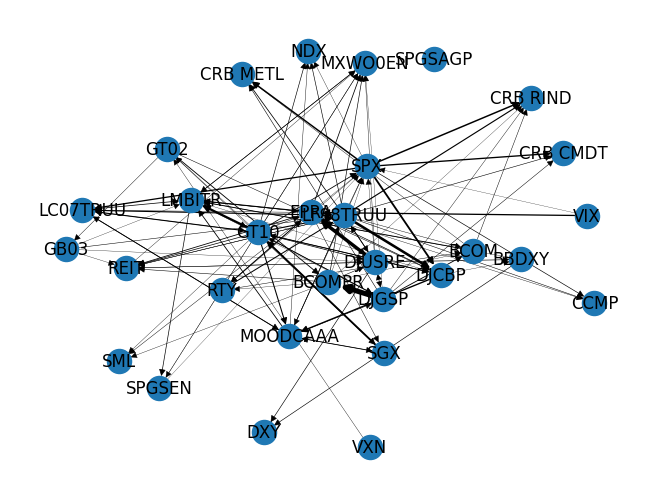

In [61]:
nx.draw(G, 
        with_labels=True, 
        width = [G[a1][a2]['weight'] * 150 for a1, a2 in G.edges()])

In [44]:
import network

In [57]:
largest_cc = max(nx.connected_components(G.to_undirected()), key=len)
G_largest_cc = G.subgraph(largest_cc).copy()

In [59]:
G_largest_cc.edges

OutEdgeView([('BCOM', 'CRB METL'), ('BCOM', 'CRB RIND'), ('BCOM', 'LMBITR'), ('MOODCAAA', 'LF98TRUU'), ('MOODCAAA', 'LMBITR'), ('MOODCAAA', 'LC07TRUU'), ('MOODCAAA', 'SPX'), ('MOODCAAA', 'NDX'), ('MOODCAAA', 'SGX'), ('MOODCAAA', 'DJGSP'), ('LF98TRUU', 'BCOM'), ('LF98TRUU', 'CRB CMDT'), ('LF98TRUU', 'CRB METL'), ('LF98TRUU', 'CRB RIND'), ('LF98TRUU', 'MOODCAAA'), ('LF98TRUU', 'DJCBP'), ('LF98TRUU', 'LMBITR'), ('LF98TRUU', 'LC07TRUU'), ('LF98TRUU', 'SPX'), ('LF98TRUU', 'NDX'), ('LF98TRUU', 'CCMP'), ('LF98TRUU', 'REIT'), ('LF98TRUU', 'DJUSRE'), ('DJCBP', 'MOODCAAA'), ('DJCBP', 'BBDXY'), ('DJCBP', 'GT10'), ('LMBITR', 'DJCBP'), ('LMBITR', 'MXWO0EN'), ('LMBITR', 'SPGSEN'), ('LMBITR', 'GT10'), ('LMBITR', 'DJGSP'), ('LMBITR', 'EPRA'), ('LC07TRUU', 'MOODCAAA'), ('LC07TRUU', 'LMBITR'), ('LC07TRUU', 'GT10'), ('BBDXY', 'LMBITR'), ('BBDXY', 'DXY'), ('MXWO0EN', 'LMBITR'), ('SPGSEN', 'MXWO0EN'), ('SPGSEN', 'SPX'), ('SPX', 'CRB CMDT'), ('SPX', 'CRB METL'), ('SPX', 'CRB RIND'), ('SPX', 'DJCBP'), ('SPX'

Your graph is directed!
100%|██████████| 30/30 [00:00<00:00, 467.85it/s]


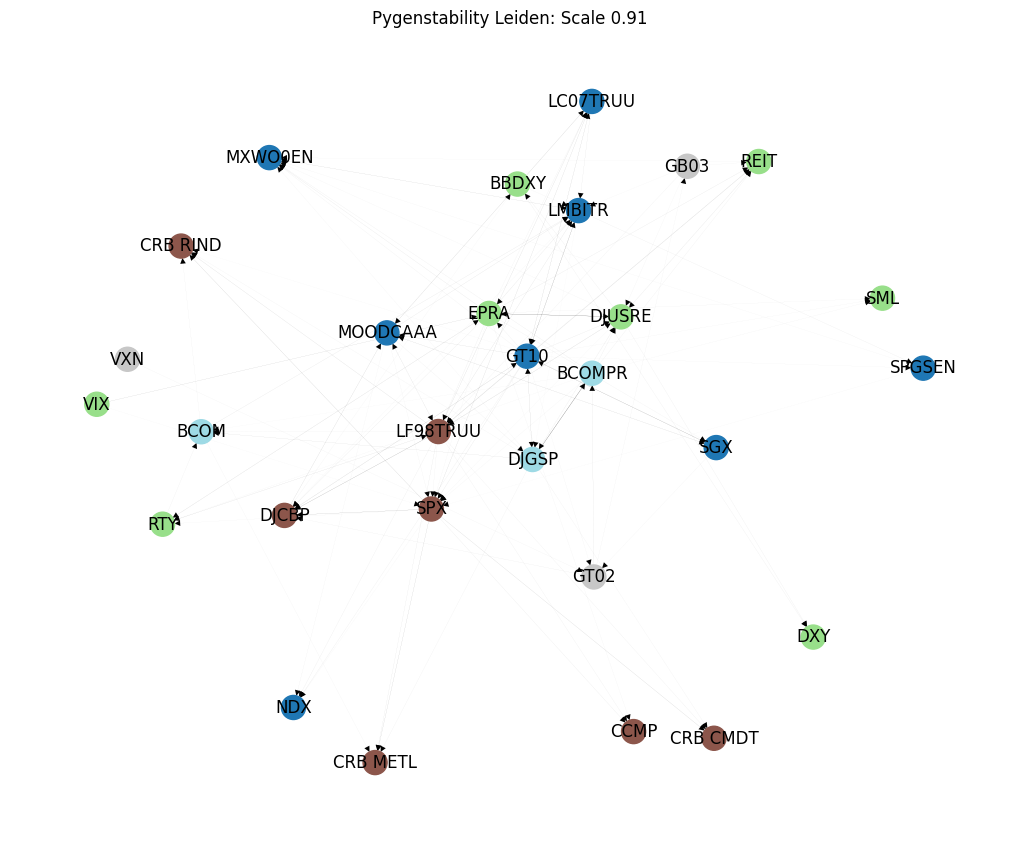

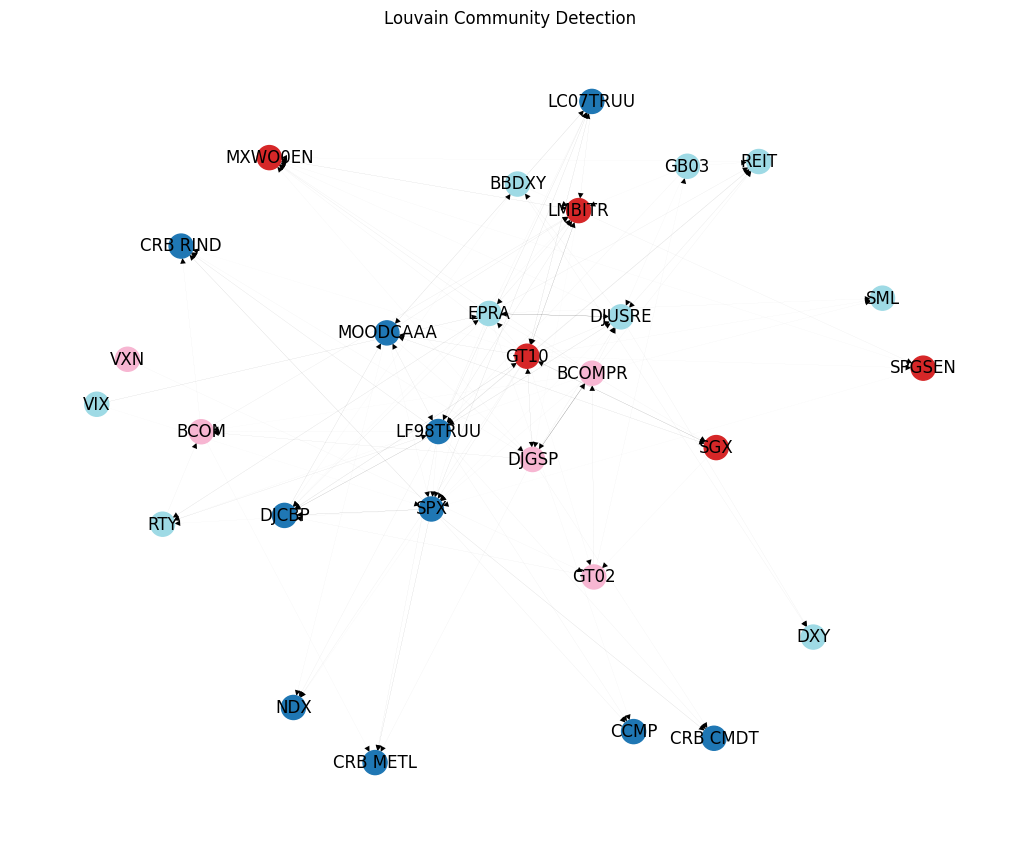

In [60]:
network.custom_plot_communities(G_largest_cc)

Adding data with properties: 30 processes, 4860 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 21
testing candidate: (0, 5) maximum statistic, n_perm: 21
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.int

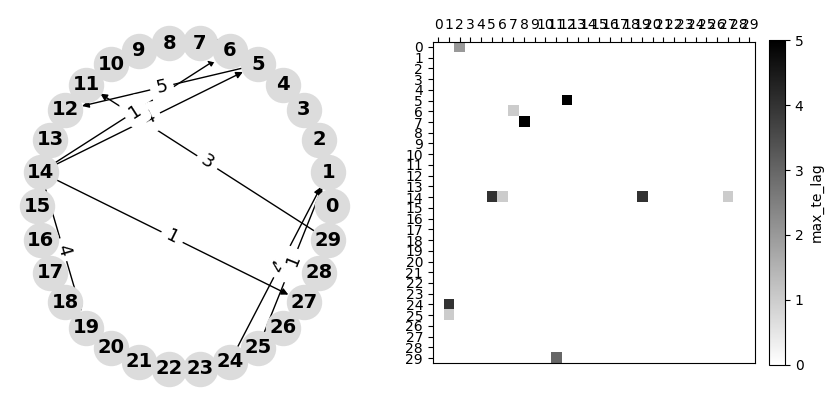

In [102]:
data_array = log_returns.to_numpy()
data_array = np.expand_dims(data_array, axis=2)

data = Data()
data.set_data(data_array, dim_order='spr')

network_analysis = MultivariateTE()
settings = {
    "cmi_estimator": "JidtKraskovCMI",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
    "n_perm_max_stat": 21
}

results = network_analysis.analyse_network(settings=settings, data=data)

results.print_edge_list(weights="max_te_lag", fdr=False)
plot_network(results=results, weights="max_te_lag", fdr=False)
plt.show()

In [103]:
with open("idtxl_log_returns_tickers_jidtkraskov", "wb") as f:
    pickle.dump(results, f)

In [113]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [10]:
def discretize_equal_width_iqr(contin_data, num_bins=2):
    min_val = contin_data.min()
    max_val = contin_data.max()
    if num_bins == 2:
        med = np.median(contin_data)
        bins = [min_val, med, max_val]
    else:
        q1 = np.percentile(contin_data, 25)
        q3 = np.percentile(contin_data, 75)
        bins = [min_val] + np.linspace(q1, q3, num_bins - 2).tolist() + [max_val]
    # std = np.std(contin_data)
    # bins = std * np.arange(-num_bins//2, num_bins//2 + 1)
    return np.digitize(contin_data, bins)

def discretize_equal_freq_iqr(contin_data, num_bins=2):
    # Use quantiles to create bins
    min_val = contin_data.min()
    max_val = contin_data.max()
    if num_bins == 2:
        med = np.median(contin_data)
        bins = [min_val, med, max_val]
    else:
        q1 = np.percentile(contin_data, 25)
        q3 = np.percentile(contin_data, 75)
        iqr_data = contin_data[(contin_data >= q1) & (contin_data <= q3)]
        quantiles = np.linspace(0, 1, num_bins - 2)
        bins = [min_val] + np.quantile(iqr_data, quantiles).tolist() + [max_val]
    
    return np.digitize(contin_data, bins)

def discretize_equal_freq(contin_data, num_bins=2):
    # Create quantile-based bins so that each bin contains roughly equal number of data points.
    quantiles = np.linspace(0, 100, num_bins + 1)
    bins = np.percentile(contin_data, quantiles)
    # Avoid duplicate bin edges in case of ties.
    bins = np.unique(bins)
    discretized = np.digitize(contin_data, bins[1:-1])
        
    return discretized

def discretize_df(dataframe, disc_func = discretize_equal_freq, **kwargs):
    discretized = {}
    columns = dataframe.columns

    for col in columns:
        discrete_col = disc_func(dataframe[col], **kwargs)
        discretized[col] = discrete_col

    dates = dataframe.index
    discretized = pd.DataFrame(discretized)
    discretized.index = pd.to_datetime(dates)
    return discretized

In [11]:
discrete_log_returns = discretize_df(log_returns, num_bins=2)

Adding data with properties: 30 processes, 4860 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3,

C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\data.py:274: RuntimeWarning: invalid value encountered in cast
  realisations = np.empty((n_real_time * n_real_repl, len(idx_list))).astype(


testing candidate: (1, 4) maximum statistic, n_perm: 200
testing candidate: (1, 5) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(0, np.int64(1)), (0, np.int64(2)), (0, np.int64(3)), (0, np.int64(4)), (0, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.int64(1)), (4, np.int64(2)), (4, np.int64(3)), (4, np.int64(4)), (4, np.int64(5)), (5, np.int64(1)), (5, np.int64(2)), (5, np.int64(3)), (5, np.int64(4)), (5, np.int64(5)), (6, np.int64(1)), (6, np.int64(2)), (6, np.int64(3)), (6, np.int64(4)), (6, np.int64(5)), (7, np.int64(1)), (7, np.int64(2)), (7, np.int64(3)), (7, np.int64(4)), (7, np.int64(5)), (8, np.int64(1)), (8, np.int64(2)), (8, np.int64(3)), (8, np.int64(4)), (8, np.int64(5)), (9, np.int64(1)), (9, np.int64(2)), (9, np.int64(3)), (9, np.int64(4))

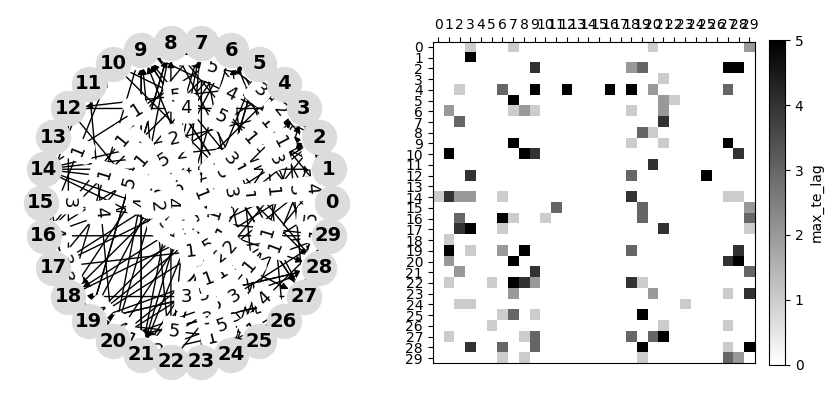

In [13]:
discrete_log_returns = discretize_df(log_returns, num_bins=2)

data_array = discrete_log_returns.to_numpy()
data_array = data_array - data_array.min()  # shift labels to start at 0
data_array = data_array.astype(int)
data_array = np.expand_dims(data_array, axis=2)

data = Data(normalise=False)
data.set_data(data_array, dim_order='spr')

network_analysis = MultivariateTE()
settings = {
    "cmi_estimator": "JidtDiscreteCMI",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
    "n_discrete_bins": np.max(data_array) + 1 
}

results = network_analysis.analyse_network(settings=settings, data=data)

results.print_edge_list(weights="max_te_lag", fdr=False)
plot_network(results=results, weights="max_te_lag", fdr=False)
plt.show()

In [16]:
with open("idtxl_log_returns_tickers_discrete_equal_freq_2_bins", "wb") as f:
    pickle.dump(results, f)

Adding data with properties: 30 processes, 4860 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 5) 
maximum statistic, n_perm: 200
testing candidate: (0, 2) maximum statistic, n_perm: 200
testing candidate: (0, 1) maximum statistic, n_perm: 200


C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\data.py:274: RuntimeWarning: invalid value encountered in cast
  realisations = np.empty((n_real_time * n_real_repl, len(idx_list))).astype(


testing candidate: (0, 3) maximum statistic, n_perm: 200
testing candidate: (0, 4) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.int64(1)), (4, np.int64(2)), (4, np.int64(3)), (4, np.int64(4)), (4, np.int64(5)), (5, np.int64(1)), (5, np.int64(2)), (5, np.int64(3)), (5, np.int64(4)), (5, np.int64(5)), (6, np.int64(1)), (6, np.int64(2)), (6, np.int64(3)), (6, np.int64(4)), (6, np.int64(5)), (7, np.int64(1)), (7, np.int64(2)), (7, np.int64(3)), (7, np.int64(4)), (7, np.int64(5)), (8, np.int64(1)), (8, np.int64(2)), (8, np.int64(3)), (8, np.int64(4)), (8, np.int64(5)), (9, np.int64(1)), (9, np.int64(2)), (9, np.int64(3)), (9, np.int64(4)), (9, np.int64(5)), 

C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\network_inference.py:1015: RuntimeWarning: invalid value encountered in cast
  ).astype(data.data_type)
C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\network_inference.py:1022: RuntimeWarning: invalid value encountered in cast
  ).astype(data.data_type)
C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\stats.py:553: RuntimeWarning: invalid value encountered in cast
  ).astype(data.data_type)


final source samples: [(15, np.int64(3)), (21, np.int64(1))]
final target samples: [(0, 5), (0, 2), (0, 1), (0, 3), (0, 4)]



####### analysing target with index 1 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 1 - testing sources [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
testing candidate: (1, 2) 
maximum statistic, n_perm: 200
testing candidate: (1, 1) maximum statistic, n_perm: 200
testing candidate: (1, 3) maximum statistic, n_perm: 200
testing candidate: (1, 4) maximum statistic, n_perm: 200
testing candidate: (1, 5) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(0, np.int64(1)), (0, np.int64(2)), (0, np.int64(3)), (0, np.int64(4)), (0, np.int64(5)), (2, np.in

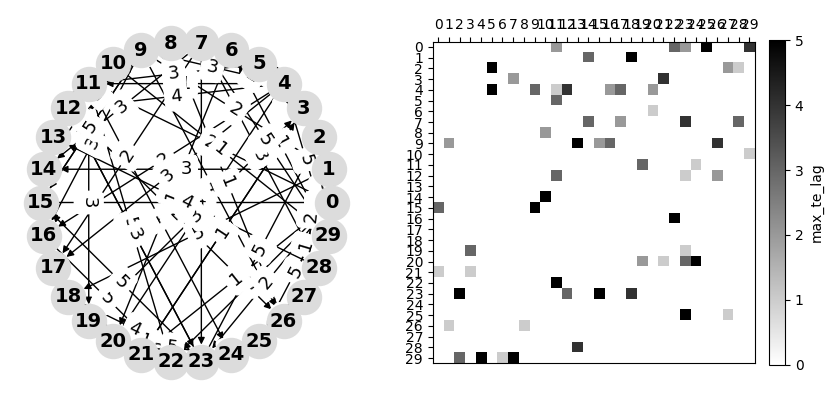

In [17]:
discrete_log_returns = discretize_df(log_returns, num_bins=3)

data_array = discrete_log_returns.to_numpy()
data_array = data_array - data_array.min()  # shift labels to start at 0
data_array = data_array.astype(int)
data_array = np.expand_dims(data_array, axis=2)

data = Data(normalise=False)
data.set_data(data_array, dim_order='spr')

network_analysis = MultivariateTE()
settings = {
    "cmi_estimator": "JidtDiscreteCMI",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
    "n_discrete_bins": np.max(data_array) + 1 
}

results = network_analysis.analyse_network(settings=settings, data=data)

results.print_edge_list(weights="max_te_lag", fdr=False)
plot_network(results=results, weights="max_te_lag", fdr=False)
plt.show()

In [18]:
with open("idtxl_log_returns_tickers_discrete_equal_freq_3_bins", "wb") as f:
    pickle.dump(results, f)

Adding data with properties: 30 processes, 4860 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 200
testing candidate: (0, 2) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
testing candidate: (0, 4) maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (

C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\data.py:274: RuntimeWarning: invalid value encountered in cast
  realisations = np.empty((n_real_time * n_real_repl, len(idx_list))).astype(


testing candidate: (24, 3) maximum statistic, n_perm: 200
testing candidate: (24, 5) maximum statistic, n_perm: 200
testing candidate: (24, 2) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(0, np.int64(1)), (0, np.int64(2)), (0, np.int64(3)), (0, np.int64(4)), (0, np.int64(5)), (1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.int64(1)), (4, np.int64(2)), (4, np.int64(3)), (4, np.int64(4)), (4, np.int64(5)), (5, np.int64(1)), (5, np.int64(2)), (5, np.int64(3)), (5, np.int64(4)), (5, np.int64(5)), (6, np.int64(1)), (6, np.int64(2)), (6, np.int64(3)), (6, np.int64(4)), (6, np.int64(5)), (7, np.int64(1)), (7, np.int64(2)), (7, np.int64(3)), (7, np.int64(4)), (7, np.int64(5)), (8, np.int64(1)), (8, np.int64

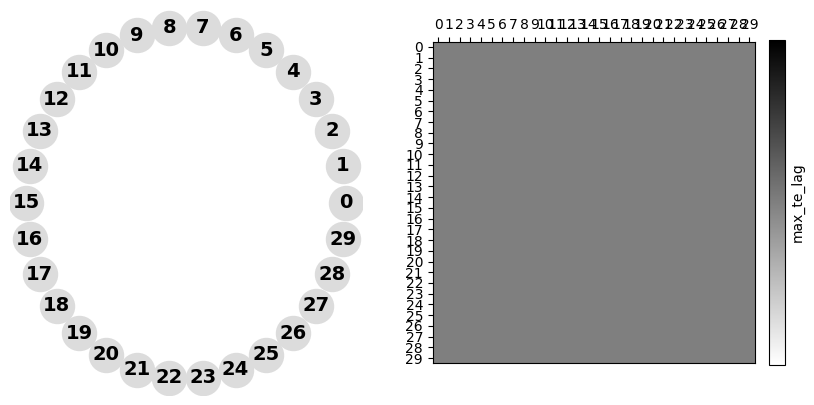

In [25]:
discrete_log_returns = discretize_df(log_returns, num_bins=4)

data_array = discrete_log_returns.to_numpy()
data_array = data_array - data_array.min()  # shift labels to start at 0
data_array = data_array.astype(int)
data_array = np.expand_dims(data_array, axis=2)

data = Data(normalise=False)
data.set_data(data_array, dim_order='spr')

network_analysis = MultivariateTE()
settings = {
    "cmi_estimator": "JidtDiscreteCMI",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
    "n_discrete_bins": np.max(data_array) + 1 
}

results = network_analysis.analyse_network(settings=settings, data=data)

results.print_edge_list(weights="max_te_lag", fdr=False)
plot_network(results=results, weights="max_te_lag", fdr=False)
plt.show()

with open("idtxl_log_returns_tickers_discrete_equal_freq_4_bins", "wb") as f:
    pickle.dump(results, f)

Adding data with properties: 30 processes, 4860 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 2) 
maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200


C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\data.py:274: RuntimeWarning: invalid value encountered in cast
  realisations = np.empty((n_real_time * n_real_repl, len(idx_list))).astype(


testing candidate: (0, 1) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
testing candidate: (0, 4) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.int64(1)), (4, np.int64(2)), (4, np.int64(3)), (4, np.int64(4)), (4, np.int64(5)), (5, np.int64(1)), (5, np.int64(2)), (5, np.int64(3)), (5, np.int64(4)), (5, np.int64(5)), (6, np.int64(1)), (6, np.int64(2)), (6, np.int64(3)), (6, np.int64(4)), (6, np.int64(5)), (7, np.int64(1)), (7, np.int64(2)), (7, np.int64(3)), (7, np.int64(4)), (7, np.int64(5)), (8, np.int64(1)), (8, np.int64(2)), (8, np.int64(3)), (8, np.int64(4)), (8, np.int64(5)), (9, np.int64(

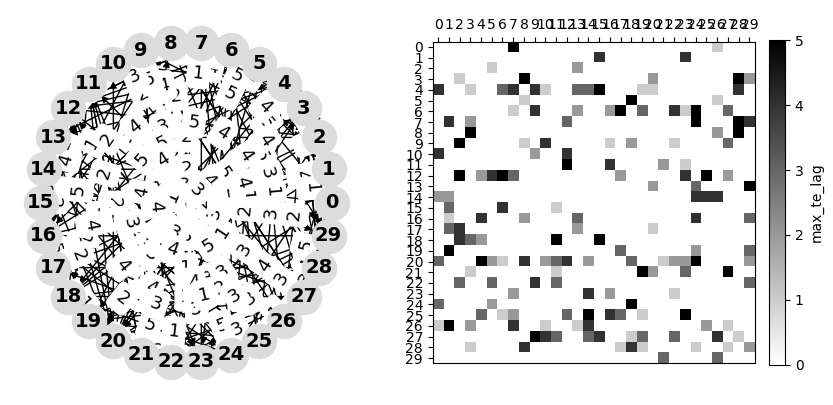

In [ ]:
discrete_log_returns = discretize_df(abs_log_returns, num_bins=2)

data_array = discrete_log_returns.to_numpy()
data_array = data_array - data_array.min()  # shift labels to start at 0
data_array = data_array.astype(int)
data_array = np.expand_dims(data_array, axis=2)

data = Data(normalise=False)
data.set_data(data_array, dim_order='spr')

network_analysis = MultivariateTE()
settings = {
    "cmi_estimator": "JidtDiscreteCMI",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
    "n_discrete_bins": np.max(data_array) + 1 
}

results = network_analysis.analyse_network(settings=settings, data=data)

results.print_edge_list(weights="max_te_lag", fdr=False)
plot_network(results=results, weights="max_te_lag", fdr=False)
plt.show()

In [24]:
with open("idtxl_abs_log_returns_tickers_discrete_equal_freq_2_bins", "wb") as f:
    pickle.dump(results, f)

Adding data with properties: 30 processes, 4860 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 3) 
maximum statistic, n_perm: 200
testing candidate: (0, 2) maximum statistic, n_perm: 200
testing candidate: (0, 1) maximum statistic, n_perm: 200


C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\data.py:274: RuntimeWarning: invalid value encountered in cast
  realisations = np.empty((n_real_time * n_real_repl, len(idx_list))).astype(


testing candidate: (0, 4) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.int64(1)), (4, np.int64(2)), (4, np.int64(3)), (4, np.int64(4)), (4, np.int64(5)), (5, np.int64(1)), (5, np.int64(2)), (5, np.int64(3)), (5, np.int64(4)), (5, np.int64(5)), (6, np.int64(1)), (6, np.int64(2)), (6, np.int64(3)), (6, np.int64(4)), (6, np.int64(5)), (7, np.int64(1)), (7, np.int64(2)), (7, np.int64(3)), (7, np.int64(4)), (7, np.int64(5)), (8, np.int64(1)), (8, np.int64(2)), (8, np.int64(3)), (8, np.int64(4)), (8, np.int64(5)), (9, np.int64(1)), (9, np.int64(2)), (9, np.int64(3)), (9, np.int64(4)), (9, np.int64(5)), 

C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\network_inference.py:1015: RuntimeWarning: invalid value encountered in cast
  ).astype(data.data_type)
C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\network_inference.py:1022: RuntimeWarning: invalid value encountered in cast
  ).astype(data.data_type)
C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\stats.py:553: RuntimeWarning: invalid value encountered in cast
  ).astype(data.data_type)


testing candidate: (1, 1) 
maximum statistic, n_perm: 200
testing candidate: (1, 2) maximum statistic, n_perm: 200
testing candidate: (1, 3) maximum statistic, n_perm: 200
testing candidate: (1, 4) maximum statistic, n_perm: 200
testing candidate: (1, 5) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(0, np.int64(1)), (0, np.int64(2)), (0, np.int64(3)), (0, np.int64(4)), (0, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.int64(1)), (4, np.int64(2)), (4, np.int64(3)), (4, np.int64(4)), (4, np.int64(5)), (5, np.int64(1)), (5, np.int64(2)), (5, np.int64(3)), (5, np.int64(4)), (5, np.int64(5)), (6, np.int64(1)), (6, np.int64(2)), (6, np.int64(3)), (6, np.int64(4)), (6, np.int64(5)), (7, np.int64(1)), (7, np.int64(2)), (7, np.int64(3)), (7, np.int64(4)), (7, np.int64(5)), (8, np.i

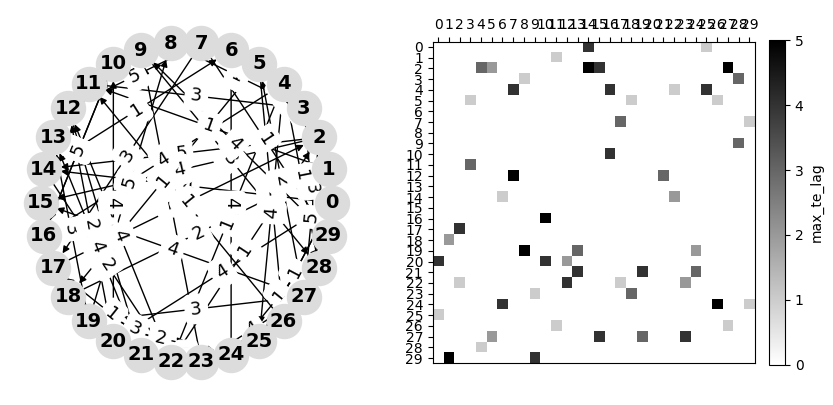

In [26]:
discrete_log_returns = discretize_df(abs_log_returns, num_bins=3)

data_array = discrete_log_returns.to_numpy()
data_array = data_array - data_array.min()  # shift labels to start at 0
data_array = data_array.astype(int)
data_array = np.expand_dims(data_array, axis=2)

data = Data(normalise=False)
data.set_data(data_array, dim_order='spr')

network_analysis = MultivariateTE()
settings = {
    "cmi_estimator": "JidtDiscreteCMI",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
    "n_discrete_bins": np.max(data_array) + 1 
}

results = network_analysis.analyse_network(settings=settings, data=data)

results.print_edge_list(weights="max_te_lag", fdr=False)
plot_network(results=results, weights="max_te_lag", fdr=False)
plt.show()

with open("idtxl_abs_log_returns_tickers_discrete_equal_freq_3_bins", "wb") as f:
    pickle.dump(results, f)

Adding data with properties: 30 processes, 4860 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 2) 
maximum statistic, n_perm: 200
testing candidate: (0, 1) maximum statistic, n_perm: 200


C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\data.py:274: RuntimeWarning: invalid value encountered in cast
  realisations = np.empty((n_real_time * n_real_repl, len(idx_list))).astype(


testing candidate: (0, 5) maximum statistic, n_perm: 200
testing candidate: (0, 4) maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.int64(1)), (4, np.int64(2)), (4, np.int64(3)), (4, np.int64(4)), (4, np.int64(5)), (5, np.int64(1)), (5, np.int64(2)), (5, np.int64(3)), (5, np.int64(4)), (5, np.int64(5)), (6, np.int64(1)), (6, np.int64(2)), (6, np.int64(3)), (6, np.int64(4)), (6, np.int64(5)), (7, np.int64(1)), (7, np.int64(2)), (7, np.int64(3)), (7, np.int64(4)), (7, np.int64(5)), (8, np.int64(1)), (8, np.int64(2)), (8, np.int64(3)), (8, np.int64(4)), (8, np.int64(5)), (9, np.int64(1)), (9, np.int64(2)

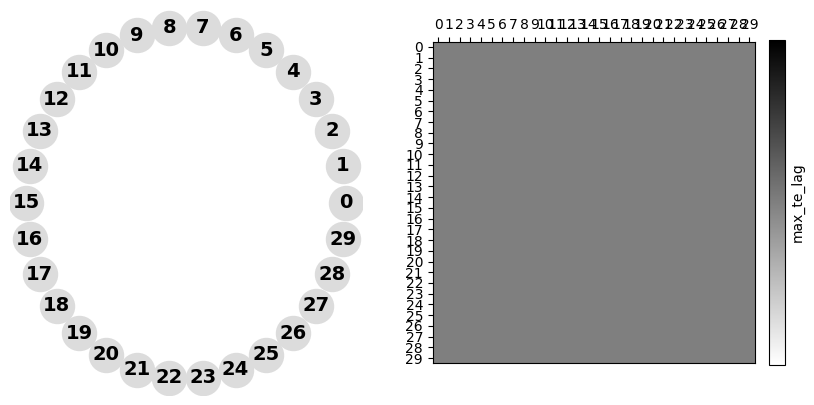

In [27]:
discrete_log_returns = discretize_df(abs_log_returns, num_bins=4)

data_array = discrete_log_returns.to_numpy()
data_array = data_array - data_array.min()  # shift labels to start at 0
data_array = data_array.astype(int)
data_array = np.expand_dims(data_array, axis=2)

data = Data(normalise=False)
data.set_data(data_array, dim_order='spr')

network_analysis = MultivariateTE()
settings = {
    "cmi_estimator": "JidtDiscreteCMI",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
    "n_discrete_bins": np.max(data_array) + 1 
}

results = network_analysis.analyse_network(settings=settings, data=data)

results.print_edge_list(weights="max_te_lag", fdr=False)
plot_network(results=results, weights="max_te_lag", fdr=False)
plt.show()

with open("idtxl_abs_log_returns_tickers_discrete_equal_freq_4_bins", "wb") as f:
    pickle.dump(results, f)

Adding data with properties: 30 processes, 4860 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3,

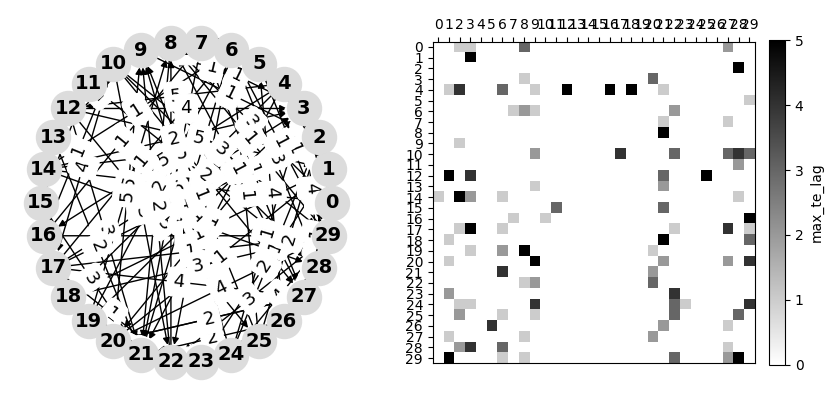

In [ ]:
data_array = log_returns.to_numpy()
data_array = np.expand_dims(data_array, axis=2)

data = Data()
data.set_data(data_array, dim_order='spr')

network_analysis = MultivariateTE()
# n_discrete_bins not specified so defaults to 2 bins. max_ent: equal number of samples in each bin
settings = {
    "cmi_estimator": "JidtDiscreteCMI",
    "discretise_method": "max_ent",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
}

results = network_analysis.analyse_network(settings=settings, data=data)

results.print_edge_list(weights="max_te_lag", fdr=False)
plot_network(results=results, weights="max_te_lag", fdr=False)
plt.show()

In [105]:
log_returns.columns

Index(['BCOM', 'CRB CMDT', 'CRB METL', 'CRB RIND', 'SPGSAGP', 'MOODCAAA',
       'LF98TRUU', 'DJCBP', 'LMBITR', 'LC07TRUU', 'DXY', 'BBDXY', 'MXWO0EN',
       'SPGSEN', 'SPX', 'NDX', 'RTY', 'CCMP', 'SML', 'SGX', 'GB03', 'GT02',
       'GT10', 'BCOMPR', 'DJGSP', 'REIT', 'DJUSRE', 'EPRA', 'VIX', 'VXN'],
      dtype='object')

In [96]:
with open("idtxl_log_returns_tickers_jidtdiscrete", "wb") as f:
    pickle.dump(results, f)

In [97]:
n_nodes = len(log_returns.columns)
te_matrix = np.zeros((n_nodes, n_nodes))

for target in results.targets_analysed:
    res = results.get_single_target(target, fdr=False)

    te_vals = res["selected_sources_te"]
    if te_vals is None:
        continue
    
    sources = [src for src, _ in res["selected_vars_sources"]]

    for src, te in zip(sources, te_vals):
        te_matrix[src, target] = te

In [98]:
G = adj_matrix_to_graph(log_returns, te_matrix)

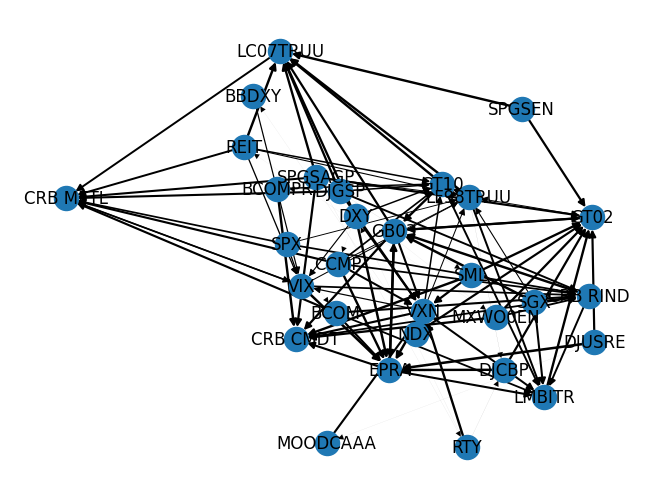

In [100]:
nx.draw(G, 
        with_labels=True, 
        width = [G[a1][a2]['weight'] * 10 for a1, a2 in G.edges()])

In [104]:
tickers

{'commodity': ['BCOM', 'CRB CMDT', 'CRB METL', 'CRB RIND', 'SPGSAGP'],
 'credit': ['MOODCAAA', 'LF98TRUU', 'DJCBP', 'LMBITR', 'LC07TRUU'],
 'currency': ['DXY', 'BBDXY'],
 'energy': ['MXWO0EN', 'SPGSEN'],
 'equity': ['SPX', 'NDX', 'RTY', 'CCMP', 'SML', 'SGX'],
 'interest': ['GB03', 'GT02', 'GT10'],
 'metals': ['BCOMPR', 'DJGSP'],
 'real_estate': ['REIT', 'DJUSRE', 'EPRA'],
 'volatility': ['VIX', 'VXN']}

Your graph is directed!
100%|██████████| 30/30 [00:00<00:00, 634.12it/s]


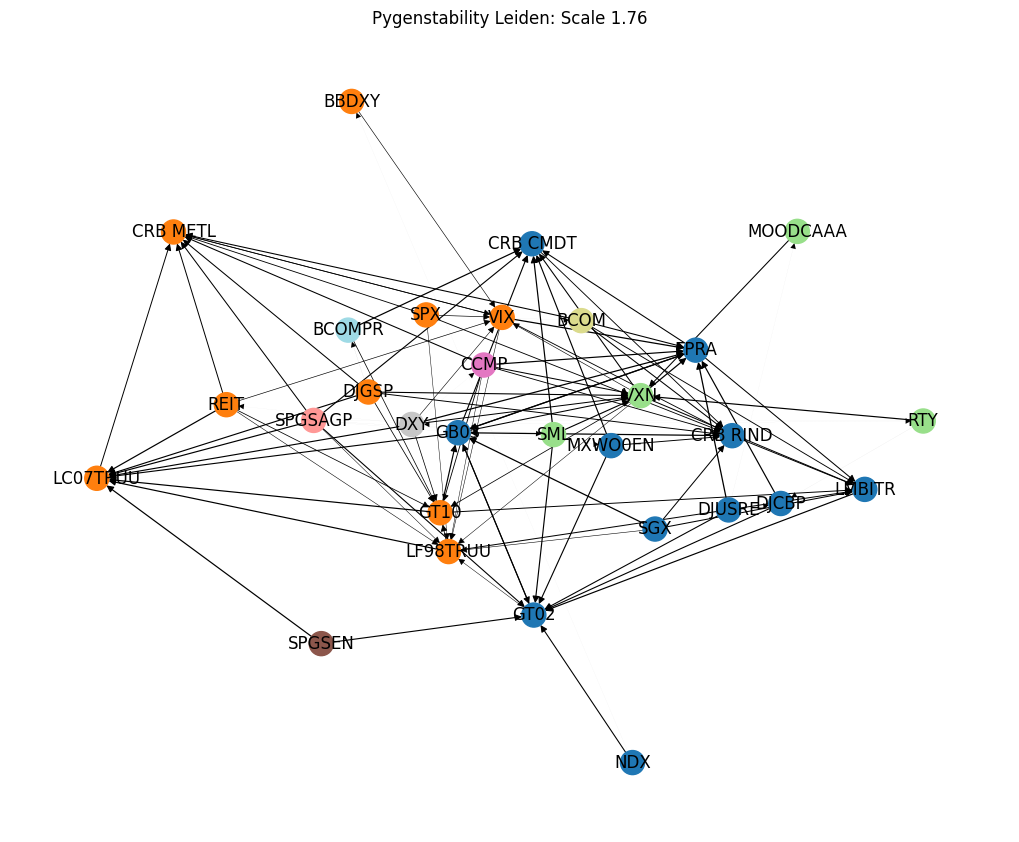

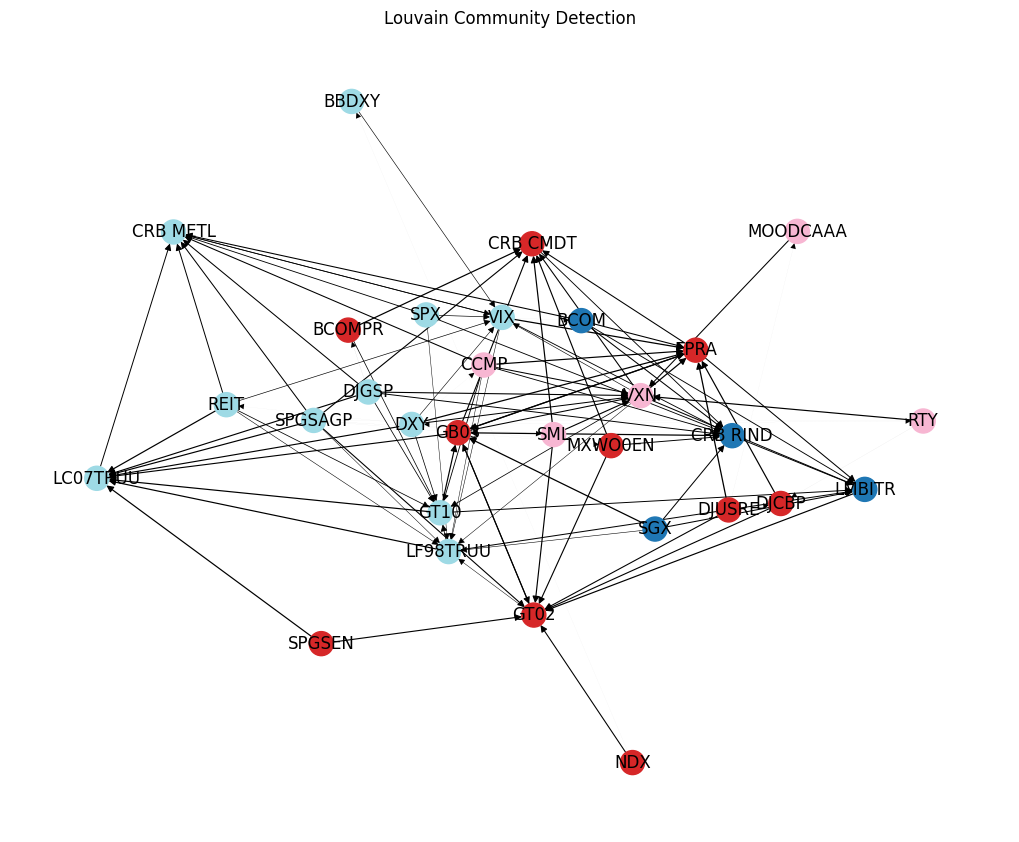

In [101]:
network.custom_plot_communities(G)

In [ ]:
def discretize_df(dataframe, disc_func = discretize_equal_freq, **kwargs):
    discretized = {}
    columns = dataframe.columns

    for col in columns:
        discrete_col = disc_func(dataframe[col], **kwargs)
        discretized[col] = discrete_col

    dates = dataframe.index
    discretized = pd.DataFrame(discretized)
    discretized.index = pd.to_datetime(dates)
    return discretized

def pca_df(dataframe):
    pca_asset_classes = 
    explained_variance_ratios = {}
    asset_classes = tickers.keys()
    for asset_class in asset_classes:
        vals = log_returns[tickers[asset_class]]
        pca, pca_components, explained_variance_ratio = compute_pca(vals)
        explained_variance_ratios[asset_class] = explained_variance_ratio
        X = pca_components[:, 0]  # Take first principal component

Adding data with properties: 30 processes, 4860 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.i

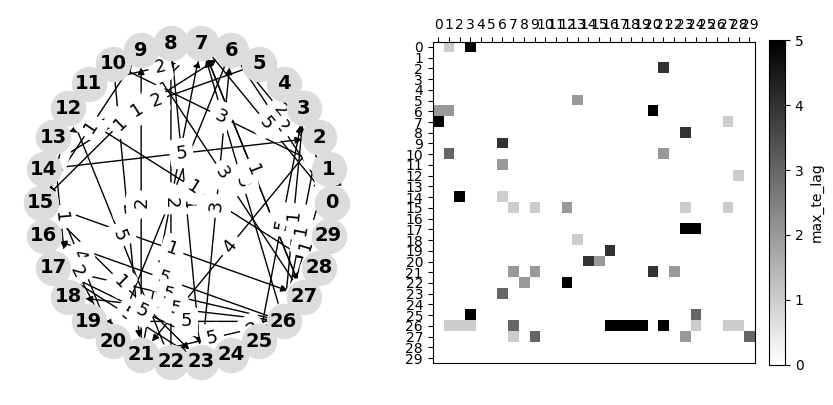

In [133]:
data_array = log_returns.to_numpy()
data_array = np.expand_dims(data_array, axis=2)

data = Data()
data.set_data(data_array, dim_order='spr')

network_analysis = MultivariateTE()
settings = {
    "cmi_estimator": "JidtDiscreteCMI",
    "discretise_method": "equal",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
}

results = network_analysis.analyse_network(settings=settings, data=data)

results.print_edge_list(weights="max_te_lag", fdr=False)
plot_network(results=results, weights="max_te_lag", fdr=False)
plt.show()

Adding data with properties: 30 processes, 4860 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 2) 
maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200


C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\data.py:274: RuntimeWarning: invalid value encountered in cast
  realisations = np.empty((n_real_time * n_real_repl, len(idx_list))).astype(


testing candidate: (0, 1) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
testing candidate: (0, 4) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.int64(1)), (4, np.int64(2)), (4, np.int64(3)), (4, np.int64(4)), (4, np.int64(5)), (5, np.int64(1)), (5, np.int64(2)), (5, np.int64(3)), (5, np.int64(4)), (5, np.int64(5)), (6, np.int64(1)), (6, np.int64(2)), (6, np.int64(3)), (6, np.int64(4)), (6, np.int64(5)), (7, np.int64(1)), (7, np.int64(2)), (7, np.int64(3)), (7, np.int64(4)), (7, np.int64(5)), (8, np.int64(1)), (8, np.int64(2)), (8, np.int64(3)), (8, np.int64(4)), (8, np.int64(5)), (9, np.int64(

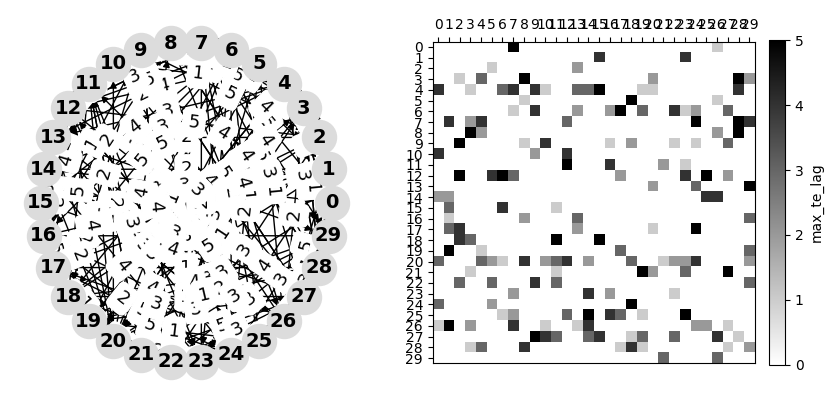

In [29]:
discrete_log_returns = discretize_df(sqr_log_returns, num_bins=2)

data_array = discrete_log_returns.to_numpy()
data_array = data_array - data_array.min()  # shift labels to start at 0
data_array = data_array.astype(int)
data_array = np.expand_dims(data_array, axis=2)

data = Data(normalise=False)
data.set_data(data_array, dim_order='spr')

network_analysis = MultivariateTE()
settings = {
    "cmi_estimator": "JidtDiscreteCMI",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
    "n_discrete_bins": np.max(data_array) + 1 
}

results = network_analysis.analyse_network(settings=settings, data=data)

results.print_edge_list(weights="max_te_lag", fdr=False)
plot_network(results=results, weights="max_te_lag", fdr=False)
plt.show()